## <div style="text-align:center"><u>Model to Authenticate Bank Notes</u></div>
            The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable.

#### <u>Following the below Framework to Implement the model

<img src="step-wise-ml-framework.png">

#### 1. Promlem Definition

This is binary classification problem, based on the given details need to find the bank note is authentic or not

In [22]:
#importing required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Data

Based on the Data collection strategy need to load the data for processing

In [6]:
#loading the data set from the text file
inp_df=pd.read_csv('data_banknote_authentication.txt',names=['Variance of Wavelet Transformed image',
                                                              'Skewness of Wavelet Transformed image',
                                                              'Kurtosis of Wavelet Transformed image',
                                                              'Entropy of image',
                                                              'Class'])

In [8]:
inp_df.head(5)

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [18]:
#checking any null values in the given data set
inp_df.isnull().sum()

Variance of Wavelet Transformed image    0
Skewness of Wavelet Transformed image    0
Kurtosis of Wavelet Transformed image    0
Entropy of image                         0
Class                                    0
dtype: int64

In [19]:
#check the class lable values counts to verify data set is balanced/Imbalanced
inp_df.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

#### 3. Evaluation Matrics

Need to get the customer requiremnet for the minimum Evaluation Matrics to accept this model, Just for practice purpose we will consider bench mark is 95% accuracy

#### 4. Feture Engineering(EDA)

In [20]:
#Need to check the disributions of the features
#If required apply feature transformations
#Need to verify the outliers
#Need to handle the outliers
#Need to verify the correlation of featurs w.r.t lable
#If required need ot drop the multi correlated features w.r.t lable
#Need to standardize the features


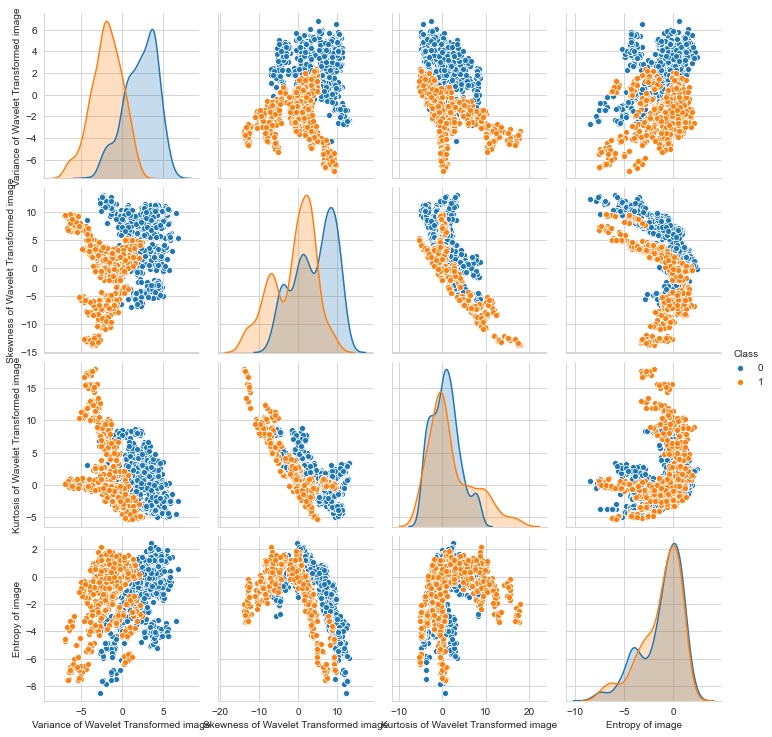

In [26]:
#creating pair plots
sns.set_style("whitegrid")
sns.pairplot(inp_df,hue="Class")
plt.show()

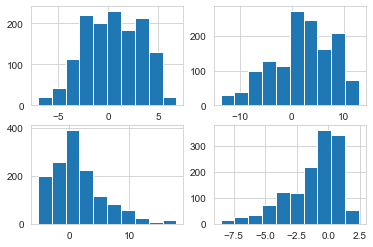

In [46]:
fig,axs=plt.subplots(2,2)
axs[0,0].hist(inp_df['Variance of Wavelet Transformed image'])
axs[0,1].hist(inp_df['Skewness of Wavelet Transformed image'])
axs[1,0].hist(inp_df['Kurtosis of Wavelet Transformed image'])
axs[1,1].hist(inp_df['Entropy of image'])
plt.show()

<AxesSubplot:xlabel='Variance of Wavelet Transformed image', ylabel='Class'>

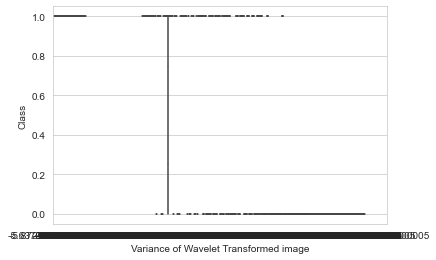

In [49]:
sns.boxplot(inp_df['Variance of Wavelet Transformed image'],inp_df['Class'])

5. Modeling

In [50]:
x_dummy=inp_df.iloc[:,:-1]
y_dummy=inp_df.iloc[:,-1:]

In [53]:
x_dummy.head(3)

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [54]:
dx_train,dx_test,dy_train,dy_test=train_test_split(x_dummy,y_dummy,test_size=0.2,random_state=42)

In [55]:
dknn_mdl=KNeighborsClassifier()

In [56]:
dknn_mdl.fit(dx_train,dy_train)

C:\AI\ML_Practice\ML_Basics\env\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier()

In [57]:
dy_pred=dknn_mdl.predict(dx_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
print(accuracy_score(dy_test,dy_pred))
print(confusion_matrix(dy_test,dy_pred))
print(classification_report(dy_test,dy_pred))

1.0
[[148   0]
 [  0 127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



6. Experiments